In [7]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.sparse import linalg

In [2]:
adj = sp.load_npz('./1985adj.npz')

In [3]:
def sqrtinvdiag(M):
    """Inverts and square-roots a positive diagonal matrix.
    Args:
        M (csc matrix): matrix to invert
    Returns:
        scipy sparse matrix of inverted square-root of diagonal
    """

    d = M.diagonal()
    dd = [1 / max(np.sqrt(x), 1 / 999999999) for x in d]

    return sp.dia_matrix((dd, [0]), shape=(len(d), len(d))).tocsc()

In [4]:
A = adj.tocsc()
D_out = sp.diags(A.transpose().sum(
    axis=0).tolist(), [0]).tocsc()
D_in = sp.diags(A.sum(axis=0).tolist(), [0]).tocsc()
Dbar = (D_in + D_out)
d = sqrtinvdiag(Dbar)
normA = d * A * d
size = A.shape[0]
H = (A-A.transpose()) * 1j
H_abs = np.abs(H)
D_abs_inv = sp.diags(1/np.array(H_abs.sum(1))[:, 0])
D_abs_inv.data[np.isinf(D_abs_inv.data)] = 0.0
H_rw = D_abs_inv.dot(H)

In [5]:
H_rw

<282x282 sparse matrix of type '<class 'numpy.complex128'>'
	with 4766 stored elements in Compressed Sparse Row format>

In [8]:
u, s, vt = sp.linalg.svds(H_rw, 100)

In [9]:
eigens = s[list(np.arange(99,-1,-1))]

In [25]:
eigengaps = eigens[:-1] - eigens[1:]

In [30]:
np.argsort(-eigengaps)

array([ 0,  2,  5,  1, 10,  8, 20, 12,  3, 51, 16, 42,  4, 28, 60, 13,  9,
       56, 39,  6, 34, 21, 47, 45, 63, 26, 29, 33, 87, 36, 14, 71, 85, 69,
       54, 76, 78, 80, 53, 66, 74, 24, 15, 37, 52, 25,  7, 19, 32, 68, 98,
       38, 30, 64, 35, 57, 93, 18, 90, 50, 72, 11, 96, 49, 95, 67, 22, 88,
       65, 73, 91, 92, 44, 46, 77, 82, 48, 59, 81, 75, 43, 83, 97, 61, 31,
       41, 58, 84, 17, 27, 70, 89, 86, 40, 23, 55, 94, 62, 79])

In [28]:
eigengaps

array([0.08477729, 0.0185497 , 0.05424653, 0.00923444, 0.00793433,
       0.02563357, 0.0057114 , 0.00358748, 0.01226459, 0.00619368,
       0.01413361, 0.00274406, 0.00963026, 0.00641984, 0.00481832,
       0.00385423, 0.00826268, 0.00104356, 0.00279692, 0.00355326,
       0.00969028, 0.00556873, 0.00231607, 0.00073473, 0.00391304,
       0.0036328 , 0.00507926, 0.0010423 , 0.00780991, 0.00497879,
       0.00319894, 0.00119077, 0.00348089, 0.00492179, 0.00569889,
       0.00305502, 0.00483779, 0.00383424, 0.00321232, 0.00597866,
       0.00077233, 0.00114634, 0.00816995, 0.00141178, 0.00192306,
       0.00520798, 0.00185642, 0.00533652, 0.00168062, 0.00248692,
       0.00278016, 0.00853161, 0.0036982 , 0.00396289, 0.00455459,
       0.00072418, 0.00601686, 0.00291057, 0.00114414, 0.00166994,
       0.00693054, 0.00122895, 0.00019298, 0.00515889, 0.00307172,
       0.00218813, 0.00392833, 0.00232743, 0.00345346, 0.00460402,
       0.00103583, 0.00480799, 0.00277746, 0.00204363, 0.00391

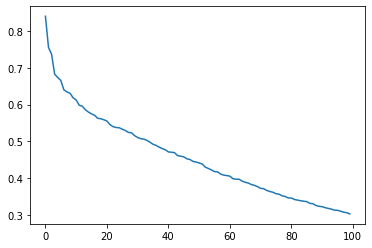

In [31]:
plt.plot(eigens)

1985
[ 0  2  5  1 10  8 20 12  3 51 16 42  4 28 60 13  9 56 39  6 34 21 47 45
 63 26 29 33 87 36 14 71 85 69 54 76 78 80 53 66 74 24 15 37 52 25  7 19
 32 68 98 38 30 64 35 57 93 18 90 50 72 11 96 49 95 67 22 88 65 73 91 92
 44 46 77 82 48 59 81 75 43 83 97 61 31 41 58 84 17 27 70 89 86 40 23 55
 94 62 79]
[0.08477729 0.0185497  0.05424653 0.00923444 0.00793433 0.02563357
 0.0057114  0.00358748 0.01226459 0.00619368 0.01413361 0.00274406
 0.00963026 0.00641984 0.00481832 0.00385423 0.00826268 0.00104356
 0.00279692 0.00355326 0.00969028 0.00556873 0.00231607 0.00073473
 0.00391304 0.0036328  0.00507926 0.0010423  0.00780991 0.00497879
 0.00319894 0.00119077 0.00348089 0.00492179 0.00569889 0.00305502
 0.00483779 0.00383424 0.00321232 0.00597866 0.00077233 0.00114634
 0.00816995 0.00141178 0.00192306 0.00520798 0.00185642 0.00533652
 0.00168062 0.00248692 0.00278016 0.00853161 0.0036982  0.00396289
 0.00455459 0.00072418 0.00601686 0.00291057 0.00114414 0.00166994
 0.00693054 0.00122895

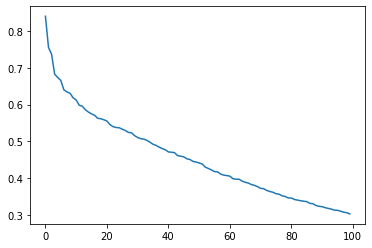

1986
[ 0  1  2  3  5 20 16  4  9 12 10 35  8 43 84  7 30 39 18 33 15 49 50 68
 17 65 29 53 31 42  6 37 83 23 59 26 93 61 47 55 27 70 77 90 73 64 28 25
 85 51 74 21 89 57 63 96 40 71 76 52 13 22 94 48 46 36 81 44 86 95 80 79
 19 91 24 54 97 69 41 56 78 38 45 11 14 72 60 62 67 98 88 66 34 87 82 58
 92 75 32]
[0.07561171 0.03218655 0.02683361 0.01985166 0.01040526 0.01470163
 0.00460877 0.00718816 0.00872293 0.01027244 0.00946476 0.00133751
 0.0098484  0.00231612 0.001291   0.0061872  0.01044346 0.00556136
 0.00646385 0.00173576 0.01111953 0.00290135 0.002265   0.00427288
 0.00169787 0.00314564 0.0041893  0.00385681 0.00331105 0.00522888
 0.00682599 0.00504947 0.00029539 0.00634227 0.00085497 0.00887746
 0.00198568 0.0044232  0.0014367  0.0067355  0.00266239 0.00160014
 0.00494769 0.00843225 0.00182916 0.00143593 0.00207919 0.00399869
 0.0021737  0.00608423 0.00598013 0.00303518 0.00232755 0.00515693
 0.00169539 0.00397234 0.00156663 0.00273514 0.0007459  0.00426651
 0.00120106 0.00403062

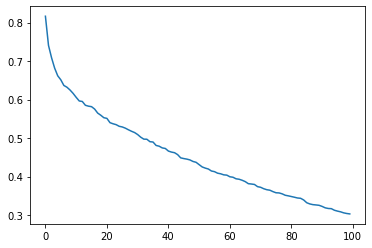

1987
[ 0  1  3  2  5  9 13  6  4 67 22 30 18 34 72 19 12 53 15 42 88 56 31 85
 24 36 29 45 61 55 16  8 38 76 98 10 28 59 47  7 20 80 49 78 93 89 46 40
 14 50 33 27 17 25 23 51 75 11 69 96 71 68 84 43 82 26 87 37 66 57 94 79
 44 70 35 63 62 65 77 73 41 95 60 21 64 39 81 52 91 97 48 54 74 90 58 86
 83 92 32]
[0.06042145 0.04706132 0.01697792 0.01800157 0.00916019 0.0161494
 0.00967282 0.00379036 0.00424455 0.01286386 0.00411428 0.00273901
 0.00675623 0.01142432 0.00329796 0.00594995 0.00426382 0.00300746
 0.00781642 0.0072103  0.00372961 0.00130495 0.00825802 0.00291766
 0.00476365 0.00300019 0.00239511 0.00313101 0.0041118  0.00462347
 0.00799301 0.0052664  0.00060246 0.00324985 0.00780235 0.0020268
 0.00470048 0.00223272 0.00419188 0.00119977 0.00333862 0.00183147
 0.00594193 0.00246798 0.00206303 0.0045465  0.00338602 0.0038
 0.00102083 0.0034709  0.00326484 0.00291724 0.00112493 0.0060079
 0.00095353 0.00439027 0.00556636 0.00217517 0.00094182 0.0039319
 0.00146109 0.00443768 0.00194

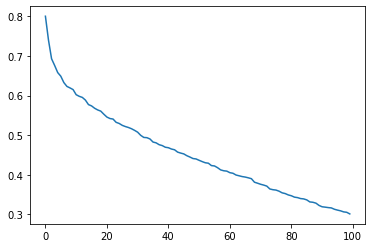

1988
[ 0  3  7  1  4 10  2 19  5  6 30 14 75  9 67 15 60 50 48 38 16 20 23 27
 95 21 41 43 77 36 39 12 28 33 53 29 56 24 13 18 90 54 73 74 79 66 81 35
 88 85 47 91 40 72 59 25 42 57 31 65 86 45 71 44 51 83 80 98 76 37 64 94
  8 93 69 26 17 11 49 70 32 96 61 58 62 84 87 52 34 68 92 46 63 55 97 89
 22 78 82]
[0.05366713 0.03012917 0.01332909 0.03137214 0.0148472  0.01108024
 0.0106764  0.03128682 0.00196929 0.00767371 0.01420775 0.00162132
 0.00428916 0.00387604 0.00829049 0.00723394 0.0056281  0.00164598
 0.00379035 0.01266443 0.00543904 0.00472062 0.00047468 0.00543501
 0.00387808 0.00274074 0.00164859 0.00518545 0.00423408 0.00407899
 0.00882711 0.00256425 0.00152996 0.00410674 0.0012242  0.00337556
 0.00433973 0.00203749 0.00580656 0.0043125  0.00296858 0.00461452
 0.00272004 0.00456584 0.00225258 0.00241769 0.00109672 0.00315793
 0.00635516 0.00158168 0.0067427  0.00221902 0.00133017 0.00408591
 0.00369676 0.00067532 0.00405941 0.00268696 0.00145594 0.00277293
 0.00676609 0.00147818

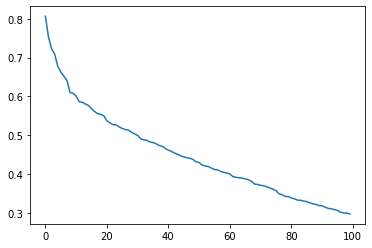

1989
[ 0  1  2  3  5  8 43 11 13 20 21 29 24 35 16 86 15 45  9 17 69 28  4 55
 49 40 31 10 64 71 38 47 57 66 80 67 61 97 32 14 51 72 59 27 75  6 54 33
 95 37 53 74 34 70 91  7 77 25 30 60 62 41 88 48 89 63 50 39 98 26 36 82
 22 78 81 52 73 92 58 42 79 94 90 65 93 76 23 18 87 56 19 83 85 84 12 44
 68 46 96]
[0.06554298 0.02092863 0.0204674  0.01863397 0.00529938 0.01816983
 0.00317734 0.00253566 0.01729043 0.00576415 0.00477732 0.01050751
 0.00050236 0.00982965 0.00373259 0.00607039 0.00705083 0.00571368
 0.00115763 0.00101698 0.00945361 0.00920083 0.00177284 0.00117217
 0.00801157 0.00238449 0.00190847 0.00338278 0.00536971 0.00841978
 0.00235499 0.0048014  0.00373576 0.00298966 0.00270527 0.00729806
 0.00185518 0.00273347 0.00446939 0.00198272 0.00480535 0.00225793
 0.00154658 0.01063184 0.00049576 0.0058367  0.00035679 0.00445615
 0.00220378 0.00498543 0.00206259 0.00348712 0.00164713 0.00273072
 0.00304656 0.00509901 0.00105743 0.00421509 0.00155944 0.00339665
 0.00232705 0.00394993

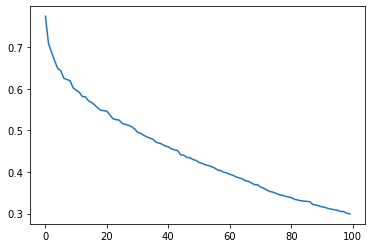

1990
[ 0  1  6  2  3 11 14  9  5 22 26 13  8 16 53 18 38 19  7 35 20 70 30 77
 31  4 60 42 49 66 27 21 43 57 51 83 12 24 17 65 55 46 67 71 36 88 47 41
 91 96 34 78 89 80 44 85 73 93 86 48 50 62 97 58 64 52 33 82 25 74 79 63
 92 98 32 39 54 29 75 59 94 10 15 40 23 90 69 84 81 61 56 95 28 87 68 72
 76 37 45]
[0.05862394 0.02644269 0.01619757 0.01488529 0.00427083 0.00976992
 0.01733167 0.00610594 0.00787462 0.01123635 0.0017334  0.01168425
 0.00356473 0.00887754 0.01145757 0.00144554 0.00741315 0.00329576
 0.00677457 0.00631354 0.00531586 0.00374643 0.00914044 0.00136889
 0.00335701 0.00219383 0.00895337 0.00379183 0.00111323 0.00191031
 0.0049651  0.00449323 0.00204917 0.00228516 0.0026341  0.00573206
 0.00305717 0.00026467 0.00662777 0.00200921 0.00137154 0.00282804
 0.0042377  0.0036892  0.00254208 0.00024157 0.0031543  0.00288613
 0.00244044 0.00420352 0.00238406 0.00361602 0.0022972  0.00687771
 0.00199692 0.00317171 0.00117548 0.00366683 0.00231785 0.0018856
 0.00426018 0.0011882  

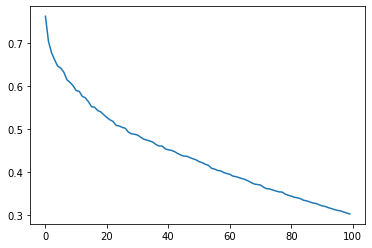

1991
[ 0  1  3  4  2 14  9 21 12  7 34  8 31  5 41 47 24 15 22 11 60 28 20 42
 85 48 19 67 52 25 43 57 27 13 94 38 36 26 40 72 62 18 77 53 58 69 45 54
 16 73 65 70 88 56 32 39 81 10 17 64 82 46 83 75 59 84 68 97 74 95 98  6
 50 23 71 79 49 63 92 51 89 55 80 76 30 90 91 35 61 93 37 44 96 78 33 87
 29 66 86]
[0.11608447 0.07420018 0.01444351 0.01980041 0.01910642 0.00783966
 0.0020504  0.0099342  0.0082976  0.01348195 0.00258802 0.00537406
 0.0110971  0.00372133 0.01411898 0.0056543  0.003136   0.00255363
 0.003395   0.00415448 0.00481798 0.01114281 0.00565359 0.00189601
 0.00576406 0.00396827 0.00356362 0.00374651 0.00499937 0.00084815
 0.00137257 0.00806007 0.00285853 0.0009108  0.00872998 0.00120799
 0.00360321 0.00104176 0.00365986 0.00281553 0.00346367 0.00689658
 0.00453751 0.00391459 0.00103154 0.00322825 0.00248212 0.0057717
 0.00421254 0.00179952 0.00192683 0.00164651 0.00398555 0.0032626
 0.00316763 0.00156753 0.00297694 0.0038205  0.00326242 0.00246175
 0.0051479  0.0011838  0

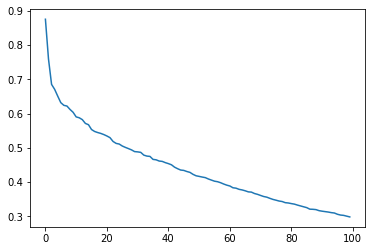

1992
[ 0  1  3  4  5 10  2  8 16  7 38 31 14 80 21 53 47 51 25 24 45 35 15 46
 32 11 23 18 27 19 12 62 71 33 20 13  9 64 91 30 98 72 49 77 86 85 54  6
 41 22 84 42 96 65 40 17 92 67 78 61 66 29 87 58 73 44 89 94 75 48 93 59
 36 88 26 34 69 95 60 68 74 57 97 70 79 56 82 55 63 37 43 28 52 50 81 39
 83 76 90]
[0.07781913 0.06457759 0.01355457 0.03592746 0.01927158 0.01637781
 0.00287978 0.00771594 0.01140478 0.00364787 0.01545233 0.00451929
 0.00437061 0.00397121 0.00607697 0.00516045 0.01043158 0.00257499
 0.00448445 0.00442053 0.00403181 0.0059034  0.00279204 0.00450339
 0.00535752 0.00556115 0.0019528  0.00448059 0.00105441 0.00240491
 0.00347431 0.00610684 0.00455297 0.00416132 0.00185167 0.00520409
 0.00195705 0.00126849 0.0072464  0.00076407 0.00259747 0.00282641
 0.00273893 0.00105919 0.00230347 0.00524427 0.00465981 0.00577191
 0.00202315 0.00322111 0.00097734 0.00574603 0.00099722 0.00583448
 0.00296342 0.00141132 0.00148421 0.0017481  0.00232153 0.00199568
 0.00181618 0.00253457

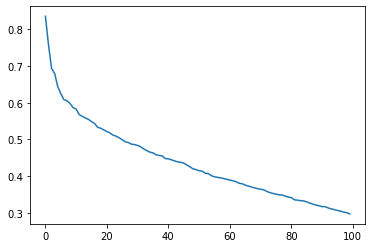

1993
[ 0  1  3  2 13 18  9 20  6  5  7 22 12 37 16 55 85 15 39 48 52 10  4 27
 59 65 24 30 45 46 68 34 42 11 66 91 38 72 32 41 60 97 17 63 33 93 82 36
 89  8 50 28 31 78 74 80 62 51 29 87 71 57 79 77 54 56 90 69 81 58 26 76
 40 14 83 96 43 53 19 84 94 61 35 75 25 88 70 49 92 95 64 23 21 86 44 73
 67 98 47]
[5.07946518e-02 3.56977376e-02 1.77223090e-02 1.83606400e-02
 5.27868685e-03 8.14236737e-03 8.30193397e-03 7.92283194e-03
 2.95744144e-03 1.09175190e-02 5.60425766e-03 4.55569232e-03
 7.68995462e-03 1.64482711e-02 1.79119983e-03 6.03747622e-03
 6.45766912e-03 3.33807336e-03 1.12186923e-02 1.58575001e-03
 8.70815196e-03 8.02497591e-04 7.80013145e-03 8.68208332e-04
 4.92002803e-03 1.41306014e-03 1.95922254e-03 5.27756690e-03
 2.86675601e-03 2.57598176e-03 4.88620477e-03 2.85578295e-03
 3.82306534e-03 3.17305341e-03 4.65969400e-03 1.46094359e-03
 3.07647221e-03 6.71471705e-03 3.94757682e-03 6.00790145e-03
 1.88735762e-03 3.59959723e-03 4.58457014e-03 1.61542108e-03
 6.77468357e-04 4.854

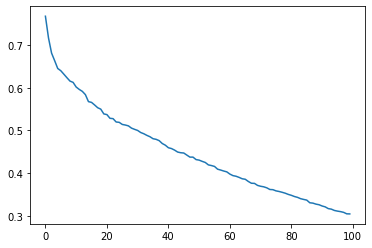

1994
[ 0  2  4  7 10 13  8 32  3 25 36  1  5  9 21 62 15 16  6 53 40 57 29 34
 19 18 52 12 76 22 28 42 49 44 55 95 46 82 66 84 26 43 58 23 47 60 80 20
 81 89 37 74 67 63 69 31 64 14 97 56 72 88 92 30 68 11 79 41 17 70 96 83
 75 71 27 77 33 91 59 86 87 35 38 45 39 85 24 54 51 50 73 78 94 61 98 90
 65 93 48]
[0.08433816 0.00657413 0.04085797 0.00736723 0.0179832  0.00647568
 0.0057103  0.01480822 0.00894373 0.00627465 0.01200134 0.00216887
 0.00505141 0.00909256 0.00252836 0.00592349 0.00592305 0.00202487
 0.005119   0.00518632 0.00295798 0.00626671 0.00486486 0.00307325
 0.00141745 0.00713883 0.00337617 0.00189086 0.00468073 0.0052805
 0.00222633 0.00271925 0.00876251 0.00177755 0.00519015 0.00165028
 0.00683564 0.00285304 0.00154767 0.00143047 0.00549824 0.00206138
 0.00403282 0.00321746 0.00387953 0.0014315  0.00359135 0.00301184
 0.00024753 0.00397877 0.00115688 0.00131171 0.00510464 0.00560326
 0.00138264 0.00381231 0.00235421 0.0053892  0.00313559 0.00171127
 0.00300289 0.00083457 

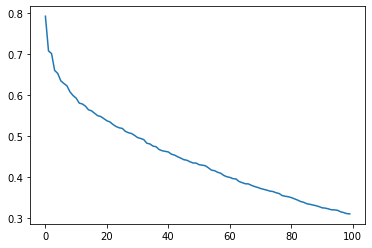

1995
[ 0  3  1 13  9  6  4  8  2 31 39  5 16 18 22 81 68 47 60 12 53 75 11 29
 20 78 24 25 57 56 35 71 49 28 21 41 37 34 43 84 23  7 10 33 26 86 98 44
 89 40 65 15 42 14 63 67 38 61 51 94 97 95 69 36 70 91 92 62 59 48 52 82
 17 32 19 88 55 27 76 64 30 93 73 77 79 90 80 74 66 46 54 45 96 58 87 50
 83 85 72]
[0.06419046 0.03295249 0.0088697  0.03484107 0.00989012 0.00680688
 0.01019478 0.00387149 0.00974412 0.01387691 0.00384651 0.00543591
 0.00582838 0.01435242 0.00294586 0.00308039 0.00676729 0.00177373
 0.00661258 0.00172263 0.00531275 0.0043515  0.00652988 0.00388352
 0.00494558 0.00493955 0.00379382 0.00168935 0.00445601 0.00531667
 0.00148086 0.00710152 0.00175562 0.00384643 0.0041943  0.00473279
 0.00240871 0.00422826 0.00279016 0.00686953 0.00332264 0.00432313
 0.00300894 0.00409664 0.00349669 0.00074529 0.00094053 0.00585418
 0.00205921 0.00447437 0.00055943 0.00268329 0.00190994 0.00581174
 0.00084161 0.00169002 0.00475696 0.0049137  0.00064048 0.00209874
 0.00585367 0.00278495

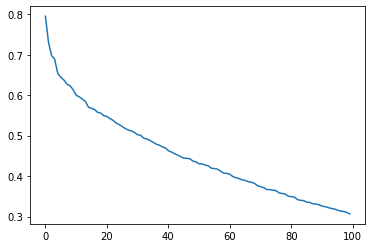

1996
[ 0  1  5  3  6  9 16 14  4 12 18 34 27 28 22 20 45 83 41  8 19 30 21 61
 55 52 95 11 67 57 89 50 74 81 37 32 23 93 39 36 77 56 15 69 58 46 42 64
 75 13 44 65  7 62 90 71 17 10 98 48 53 33 87 84  2 47 49 40 92 26 72 79
 76 43 73 85 54 25 94 35 80 51 78 63 68 96 38 29 24 59 82 66 60 88 97 31
 70 91 86]
[0.06479745 0.02230653 0.0021012  0.0136042  0.00879489 0.02083247
 0.01058472 0.00285758 0.00546524 0.0094182  0.00259166 0.00426434
 0.00865105 0.0029096  0.00887491 0.00316499 0.00896509 0.00269301
 0.00781286 0.00516066 0.00685316 0.0049836  0.00688999 0.00349882
 0.0011232  0.00158764 0.00173392 0.0074486  0.00737014 0.00122887
 0.00507068 0.000647   0.00354404 0.00242621 0.00767563 0.00153366
 0.00338328 0.00355145 0.00127309 0.00344657 0.00200804 0.00586936
 0.00302368 0.00162235 0.00289579 0.00658967 0.00303267 0.00205553
 0.0024844  0.00203776 0.0038102  0.00138101 0.00443675 0.00246454
 0.00159671 0.00464161 0.00329965 0.00410996 0.00309501 0.00097316
 0.00087966 0.00485475

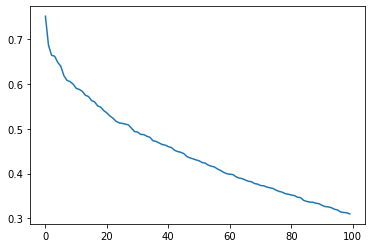

1997
[ 0  1  6  4 19  8 14 35  2 12  5 39 36 10 30 33 26 11  7 22 58 95 16 29
 47 49 46 23 60 27 42 69 56 54 79 82 15  3 28 78 63 61 21 74 68 37 71 52
 17 55 80 20 89 48 18 24 66 67 85 96 43 87 75 70 13 34 62 53  9 97 72 77
 45 93 65 91 73 98 51 40 25 76 86 92 41 84 44 90 83 32 59 31 81 64 94 38
 57 88 50]
[0.05435946 0.03043521 0.00851219 0.0038431  0.01336027 0.00706876
 0.02234809 0.00549399 0.01106621 0.00170576 0.00594387 0.00555385
 0.00752539 0.00197466 0.00883525 0.00386907 0.00500917 0.00313808
 0.00265505 0.01121957 0.00296357 0.00342379 0.00534604 0.00465448
 0.00261072 0.00117668 0.00583707 0.00448918 0.00378975 0.00497277
 0.00592529 0.00062902 0.00072676 0.00592202 0.00191371 0.00871519
 0.00640661 0.00321196 0.000515   0.00668358 0.00121069 0.00088912
 0.00439651 0.00222363 0.00083371 0.00145591 0.00475437 0.00483588
 0.00267785 0.00480665 0.00013604 0.0012162  0.00316637 0.00174308
 0.00421729 0.0030667  0.00433981 0.00035229 0.00519619 0.00067236
 0.0045315  0.00342668

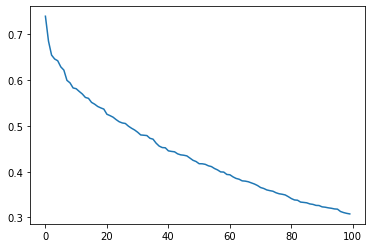

1998
[ 0  6  1  2  3  5 16 13 11  9  8  4 25 20 51 10 32 67 24 33 45 89 18 15
 59 79 19 28 23 27 54 41 53 35 84 46 37 26 29 49 14 50 62 83 47 22 36 77
 75 21  7 31 76 69 42 86 72 82 63 66 68 44 57 61 71 87 56 73 93 60 94 95
 91 30 40 39 43 97 52 92 96 58 38 65 12 78 98 48 64 70 17 34 90 81 55 74
 85 88 80]
[0.07243646 0.01633893 0.01474581 0.01423364 0.00850982 0.01069006
 0.01738273 0.00316409 0.00857543 0.0087496  0.00683941 0.00920753
 0.00103801 0.00970673 0.00355283 0.00496709 0.00995634 0.00077949
 0.00511436 0.00431835 0.00782942 0.00322339 0.00338658 0.00417058
 0.00592456 0.00847977 0.00362623 0.004066   0.0042184  0.00356704
 0.00223037 0.00305565 0.00663327 0.00586391 0.00071477 0.00387441
 0.00337786 0.00362884 0.00130852 0.00194587 0.00207139 0.00392865
 0.00297433 0.00179593 0.00273983 0.00577369 0.0037516  0.00342998
 0.00097868 0.00355323 0.00353631 0.00751665 0.00170212 0.0039106
 0.00401724 0.00047261 0.00249069 0.00265818 0.00136623 0.00483199
 0.00245328 0.00263669 

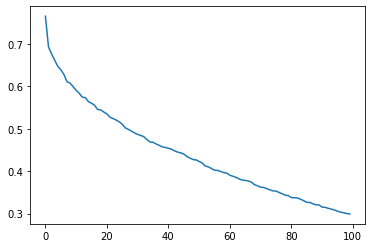

1999
[ 0  1  2  8  4  3  6 15  5 57 10 23 13  7 85 12 28 26 38 45 16 11 36 69
 51 24 59 19 42 29 31 20 25 21 35 14 81 97 71 47 55 77 27 30 34 58 74 49
 79 50 73 65 32 22 91 41 52 40 82 95 86  9 62 33 96 67 90 76 92 48 60 46
 56 66 70 88 37 53 68 43 18 89 61 72 63 78 83 87 54 93 75 44 64 17 84 39
 80 98 94]
[0.05942077 0.03512052 0.01861334 0.01259948 0.01415235 0.00758215
 0.01172329 0.00646389 0.0172423  0.0022739  0.00693249 0.00520554
 0.00631209 0.00672152 0.00390171 0.0079295  0.00536409 0.00062493
 0.00140806 0.00498581 0.00434704 0.00408902 0.00254312 0.00687499
 0.00501264 0.00415774 0.00580916 0.00344699 0.00603126 0.00492416
 0.00332595 0.00458335 0.00262258 0.00221323 0.00328602 0.00400243
 0.00506752 0.00154187 0.0054715  0.0005115  0.00246367 0.00250015
 0.00495551 0.00141564 0.00081807 0.0054043  0.00169546 0.0036448
 0.00195431 0.00303373 0.00282264 0.00505981 0.00249771 0.00149897
 0.00099988 0.00363002 0.00168118 0.00727072 0.00315518 0.00500888
 0.00187178 0.00132219 

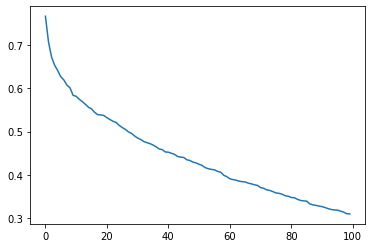

2000
[ 0  2  9  3 12  7  5 16 28 21 32  1 27 98  8 19 65  6 34 15 51 20 35 83
  4 25 43 24 53 70 38 23 76 41 55 96 45 47 73 31 57 86 11 87 42 68 48 46
 59 63 49 58 37 71 18 79 81 13 80 40 89 54 26 91 56 61 10 60 17 74 39 30
 33 82 94 50 22 78 67 69 93 92 66 72 36 62 90 52 14 77 75 97 29 85 64 44
 95 84 88]
[0.07299228 0.00719975 0.01317537 0.01244432 0.00479282 0.00904771
 0.00588113 0.01083045 0.00620358 0.01253953 0.00210883 0.00343205
 0.01151462 0.00268391 0.00097608 0.00514461 0.0076755  0.0020091
 0.0028066  0.00607236 0.0050127  0.00746358 0.00168987 0.00421348
 0.00448466 0.00464582 0.00244264 0.00646907 0.0075107  0.00074821
 0.00193674 0.00371259 0.00736518 0.00177724 0.00519484 0.00491051
 0.00124013 0.00288869 0.00421938 0.00196146 0.00246941 0.0038799
 0.00324629 0.00462018 0.00038624 0.00377473 0.00314836 0.00373702
 0.00321463 0.00308281 0.00169255 0.00507646 0.00109973 0.00429832
 0.00245128 0.00387796 0.0021985  0.00361548 0.00300419 0.0031157
 0.00204084 0.00219727 0.

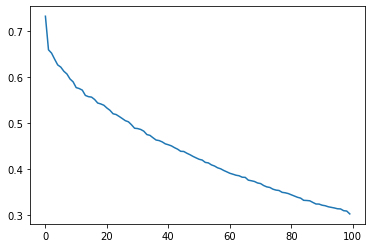

2001
[ 0  3  6  4  2  9  7  8 12 49 71 66 26 42 31 17 74 14 32 22 20 15 36 19
 39 54 52 87 89 81 56 41 29 62 13 77 58 47 33 43 93 28 60 11 21 37 97 57
 90 91 50 25 18 83 30 68 82 34 75 40 65 79 23 45 78 86 92 16 44 59 38 95
 67 53  5 46 10 63 64  1 84 55 85 88 69 72 73 61 27 94 96 24 35 98 70 80
 51 76 48]
[0.07374202 0.0013846  0.01168893 0.02589463 0.0140996  0.00150997
 0.01560029 0.00841959 0.00753506 0.0112574  0.00149322 0.00319439
 0.00680265 0.0034942  0.00512932 0.00452554 0.00180257 0.00533822
 0.00269568 0.00408659 0.00467951 0.00318605 0.00507017 0.002143
 0.00089963 0.00275937 0.00599529 0.00113102 0.00321641 0.00361191
 0.00265572 0.00539185 0.00509534 0.00335091 0.00253723 0.00089006
 0.0045223  0.00305524 0.00162523 0.0040841  0.00237832 0.00361786
 0.00557229 0.00325863 0.0016976  0.00196879 0.00150256 0.00344046
 0.00023695 0.00646992 0.00283059 0.00042167 0.00389725 0.001535
 0.00397665 0.00136005 0.00362469 0.00296562 0.00344597 0.00163501
 0.00321494 0.00115747 0.0

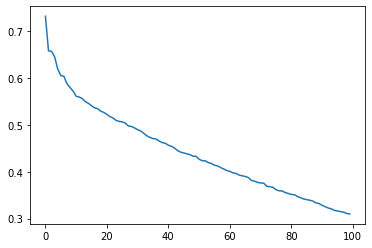

2002
[ 0  9  3  5  1 12 26 11 20 10  8  4  6 32 13 33 18 48 16 71 41 95 23 59
 43 61 56 15 29 78 51 63 27 22  7 44 55 35 92 54 84 36 88 17 39 76 50 25
 82 79  2 46 89 70 53 77 40 31 24 14 58 73 81 85 67 65 60 38 96 30 68 64
 93 21 45 42 62 34 66 90 83 57 49 52 97 19 87 86 47 74 37 94 75 69 91 28
 72 98 80]
[0.07017567 0.01555617 0.00253311 0.01588767 0.00776785 0.01560865
 0.00762369 0.00355297 0.00815523 0.0182397  0.00840805 0.00960328
 0.01063826 0.00712641 0.00212978 0.00405354 0.00547139 0.00309901
 0.00556704 0.00121302 0.0088256  0.00162966 0.00360123 0.00475909
 0.00213565 0.00290645 0.00982353 0.0037415  0.00075536 0.00401015
 0.00185274 0.00215674 0.00759059 0.00709109 0.00153097 0.00333867
 0.00317446 0.00097808 0.00189011 0.00306154 0.00217639 0.00496841
 0.00157274 0.00444006 0.00335671 0.00162703 0.00240967 0.00109482
 0.00548202 0.0013622  0.002921   0.00388669 0.00124889 0.0022457
 0.00327615 0.00335488 0.00409603 0.00138567 0.00212111 0.00465922
 0.00201015 0.00443892 

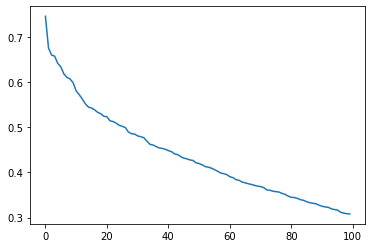

2003
[ 0  1  9  5  8  2 46 15  6 17 60 12  4 52 13 30 27 35 73 31 22 81 39 18
 20 34 53 21 55  7 48 78 95 43 11 90 65 72 86 57 16 88 67 70 26 98 58 41
 62 51 56 64 66 37 23 24 14 76 74 28 25 45 29 36 49 19 92 89  3 44 10 93
 96 83 68 32 59 80 33 97 40 91 50 79 54 84 47 69 82 63 87 77 38 85 61 71
 94 75 42]
[0.06896857 0.0250334  0.01037265 0.00192955 0.00727942 0.0138453
 0.00883769 0.0041694  0.01204306 0.01728185 0.00187108 0.00339812
 0.00758814 0.00617169 0.00234732 0.00891266 0.00278476 0.00791329
 0.00477426 0.00207819 0.00476001 0.00439141 0.00520117 0.00241252
 0.00236921 0.00221608 0.00264647 0.00594147 0.0022717  0.00216306
 0.00603525 0.00528413 0.00163728 0.00135325 0.00470347 0.00537978
 0.00214061 0.0024133  0.00076893 0.00507841 0.00118011 0.00258721
 0.00038992 0.00356916 0.0018824  0.00219466 0.01024682 0.00099532
 0.00395132 0.00210612 0.00111741 0.00250479 0.00644262 0.00451745
 0.00104033 0.00421657 0.00248504 0.00280529 0.0026087  0.00159307
 0.00772013 0.0005576  

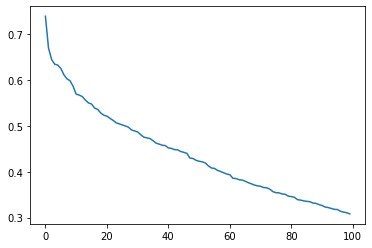

2004
[ 0  1  4  7  6  8  9 11 38 23 13 60  2 15 17 25 27 35 21 19 24  5 44 41
 10 30 69 20 51 73 14 31 18 63 77 84 37 36 68 66 89 80 45 57 58 49 54 62
 32 56 71 96 53  3 29 48 65 40 83 59 76 78 87 50 47 93 34 85 95 74 39 70
 61 55 64 43 81 67 91 79 42 94 72 16 46 33 90 26 22 52 92 28 98 86 82 75
 88 12 97]
[0.05927917 0.02463539 0.00666593 0.00272163 0.01891128 0.00506528
 0.01293001 0.01401221 0.01187796 0.01092681 0.00475741 0.00876892
 0.00032535 0.00707451 0.00401063 0.00632506 0.00129155 0.00609575
 0.00386801 0.00563896 0.00456871 0.00573695 0.0011186  0.00788483
 0.00537755 0.00602782 0.00115638 0.00579681 0.00084548 0.00260129
 0.00474712 0.00390242 0.00285172 0.00125652 0.00209714 0.00577003
 0.00367753 0.00369385 0.00844409 0.00188186 0.00254188 0.00491836
 0.00160775 0.00174264 0.00493543 0.00320704 0.00129072 0.00223993
 0.00259019 0.00304419 0.00224568 0.00447558 0.00111832 0.00278844
 0.00300563 0.00181076 0.00279982 0.00319063 0.00315302 0.0024138
 0.00673308 0.00183442 

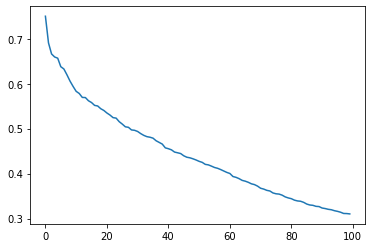

2005
[ 0  3  9  4  2 12  5 14 39 44  1 17 48 21 22 75 23  7 51 88 36 10 11 32
 34 26 63 28 19 56 54 29 53 95  8 70 83 31 18 62 41  6 57 65 15 59 45 64
 76 43 47 35 84 87 30 72 68 20 60 92 24 93 13 37 71 67 78 98 61 89 77 80
 97 69 52 79 81 96 16 94 73 27 82 25 33 38 90 49 46 50 66 86 85 55 58 74
 40 91 42]
[0.08494119 0.00711857 0.01463115 0.02567846 0.01525626 0.00844992
 0.00337286 0.00567429 0.00366596 0.01759546 0.00473437 0.00467823
 0.01003356 0.00202165 0.00817651 0.00300143 0.00131384 0.00687468
 0.00354922 0.00409084 0.00220133 0.00580488 0.00577679 0.00570342
 0.0021265  0.00106898 0.00424125 0.00120329 0.00411244 0.00379614
 0.00222851 0.00358364 0.0044892  0.00101714 0.00447564 0.0024367
 0.0048046  0.0018585  0.00098136 0.00717836 0.00043572 0.00341466
 0.00010144 0.00261014 0.00714458 0.00274677 0.00090397 0.00244872
 0.00676549 0.00090522 0.00088702 0.00507664 0.00149397 0.00371826
 0.00380039 0.00076932 0.00394618 0.00331991 0.00060474 0.00279659
 0.0021879  0.00174397 

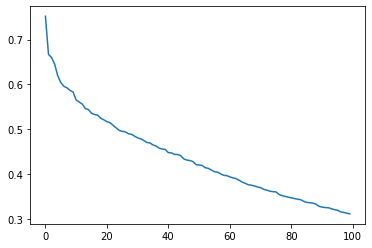

2006
[ 0  3  1 10  7 19  5 12  8 24 28 48 15 30 33 25 21 20 40 39 37 55 45 81
 32 51 82 58  4 67 56 69 41 76 35 17 60 43 42 79 61 53 46 36 71  6 92 89
 50 73 93 26  9 86 63 14 64 91 95 57 13 83 97 66 29 75 87 18 34 16 38 31
 96 62 65 49 84 54 52 98 78 68 22 94 59 85 74 77 72 11  2 44 88 80 70 90
 23 47 27]
[0.07079016 0.01838415 0.00086239 0.01880839 0.00361628 0.00927584
 0.00254165 0.01025378 0.0082442  0.00218601 0.01327962 0.00086964
 0.00900636 0.00193833 0.00201335 0.00580219 0.00167294 0.00294356
 0.00168718 0.0095872  0.00479231 0.0050459  0.00117316 0.00058245
 0.00689226 0.00508244 0.002265   0.00013328 0.00647661 0.00185648
 0.00577043 0.00160546 0.00414318 0.00556437 0.00167385 0.00304468
 0.00258903 0.00438495 0.00165424 0.0045049  0.00450663 0.00321853
 0.00277764 0.00280722 0.00084089 0.00419115 0.00272858 0.00022006
 0.0061024  0.00139942 0.00241822 0.00401567 0.0012526  0.00273429
 0.00130862 0.00433013 0.00334328 0.00194306 0.00368482 0.00111038
 0.00291468 0.00276323

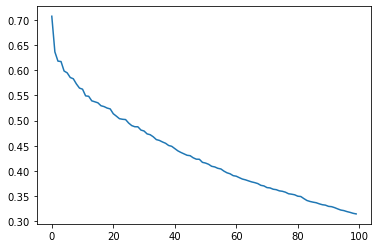

2007
[ 0  1  3  4  6  2 10 17  5 12 37 22  8 23 59 14 28 48 16 78 42 67 26 30
 29 64 82 43 40  7 51 72 69 36 15 56 97 19 13 55 57 45 46 24 90 73 33 27
 38 50 11 52 61 39 74 94 77 25 75 87 80 89  9 18 88 85 92 53 31 44 76 84
 68 81 98 70 83 65 95 63 20 49 66 34 79 41 32 47 86 60 91 96 62 93 71 54
 58 35 21]
[0.0875617  0.02443363 0.0105225  0.01732158 0.01432872 0.00872641
 0.0114964  0.00339453 0.00558686 0.00197943 0.00953067 0.00267875
 0.00633852 0.00310583 0.00463828 0.00329133 0.00425002 0.00914344
 0.0019757  0.00318027 0.00127803 0.00042265 0.00574589 0.00505239
 0.00294252 0.0022408  0.00373236 0.00274953 0.0044709  0.00370624
 0.00370834 0.001869   0.00101668 0.00276884 0.00123546 0.00045006
 0.00329985 0.00614693 0.00273116 0.00255868 0.00339819 0.00105929
 0.00385397 0.00343277 0.00184631 0.00299041 0.00294749 0.00101061
 0.0043395  0.00126193 0.0027071  0.00339303 0.00267814 0.00188217
 0.00059858 0.00309258 0.00327301 0.0029986  0.00046927 0.00492719
 0.00099538 0.00259907

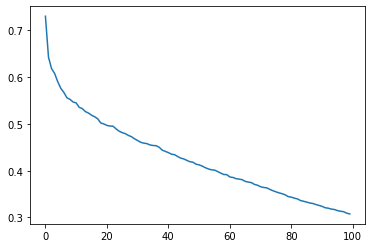

2008
[ 0  3  1  4  5  2  6 28 36 17 62  8 16 10 12  9 21 67 48 33 57 68 39 20
 11 25 14 93 46 76 72 40 19 30 89 24 31 87 52 54 51 43 64 85  7 47 56 23
 83 45 84 79 80 13 69 26 59 27 15 18 97 96 70 94 32 38 44 71 82 60 65 91
 35 42 58 78 81 53 73 92 50 98 22 90 49 75 55 66 37 95 74 61 63 77 88 86
 34 41 29]
[6.97741742e-02 2.48863172e-02 1.16668043e-02 3.50239891e-02
 1.43837493e-02 1.28562523e-02 1.04469239e-02 2.45229486e-03
 6.60629166e-03 5.86368521e-03 6.52291418e-03 4.32767518e-03
 6.33950772e-03 2.04820154e-03 4.24595204e-03 1.86328316e-03
 6.52668923e-03 7.56961677e-03 1.84486080e-03 3.86134029e-03
 4.35386800e-03 5.24440476e-03 1.04448498e-03 2.34464084e-03
 3.54693817e-03 4.29818950e-03 1.95175090e-03 1.89332018e-03
 8.45681083e-03 9.98421670e-05 3.65167247e-03 3.34098661e-03
 1.69707259e-03 4.43550573e-03 1.90405840e-04 1.48716690e-03
 7.85440282e-03 7.75493810e-04 1.68195350e-03 4.38201269e-03
 3.90279471e-03 1.40797695e-04 1.46440463e-03 2.80132559e-03
 1.66774674e-03 2.294

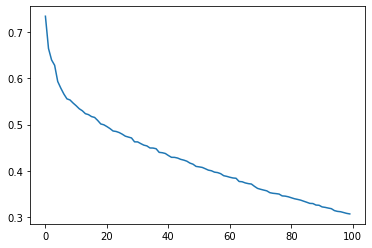

2009
[ 0  2 14  6  8 21  9  1 35 10  3 13 19 24 39 44  4 32 18 81 71 95 17 42
 62 74  7 53 43 23 55 26 12 31 63 68 34 28 11 76 41 52 61 59 83 30 46 38
 70 67 40 22 98 65 48 56 33 91 51 37 57 79 87 66 78 94 92 88 85 29 93  5
 47 54 89 97 86 15 77 49 50 90 84 58 25 82 73 45 27 20 72 64 60 80 75 16
 96 69 36]
[0.08295595 0.00755998 0.04063069 0.00704055 0.00477687 0.00148965
 0.01050096 0.00395669 0.0098468  0.00947695 0.00705343 0.00317125
 0.00347674 0.00499644 0.01235993 0.00135308 0.00060958 0.00425031
 0.00457822 0.00497217 0.00080566 0.00958401 0.00259432 0.0037921
 0.00493865 0.00109773 0.00374908 0.00088538 0.0032332  0.00158082
 0.00288758 0.00347021 0.00474342 0.00231527 0.00326821 0.00716708
 0.0002742  0.00229992 0.00282684 0.00489228 0.00259745 0.0029785
 0.00420589 0.00389881 0.00478284 0.00089128 0.00285503 0.00147048
 0.00243078 0.00129641 0.0012494  0.00230187 0.00297355 0.00395426
 0.00145986 0.00375917 0.0024169  0.00228594 0.00110171 0.00289355
 0.00075605 0.00289745 0

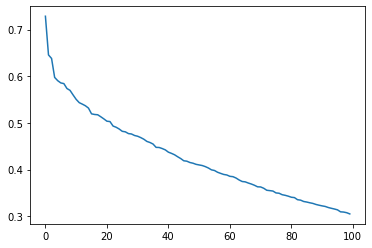

2010
[ 0  3  1  2  4  6 20  9 17 14 10  7 34 19 13 44 25 68 26 16  5 64 48 54
 55 30 11 42 43 23 87 52 31 71 32 24 38 36 51 58 94 57 29 35 40 60 91 22
 78 96 74  8 77 59 81 12 62 61 45 92 85 75 93 79 89 41 70 90 15 28 47 72
 49 86 33 65 46 82 37 27 53 84 83 97 73 56 76 39 50 66 18 80 67 69 21 63
 88 95 98]
[0.0726517  0.01874849 0.01772304 0.0187998  0.01315078 0.00480793
 0.01253556 0.00651539 0.00244183 0.00788977 0.00721753 0.00414291
 0.00226207 0.00583805 0.00726864 0.00190126 0.0050546  0.00732665
 0.00059626 0.00598477 0.00817795 0.00044664 0.00276998 0.00392855
 0.00365277 0.00554328 0.00509154 0.00113744 0.00188438 0.00292881
 0.00420475 0.00372219 0.00368224 0.00141826 0.0064852  0.00286893
 0.00343988 0.00120783 0.00358264 0.00079566 0.00281328 0.00192229
 0.00408537 0.00393359 0.00582706 0.00201987 0.00134928 0.00184343
 0.00471345 0.00177268 0.0007213  0.00335805 0.00384762 0.00109695
 0.00467157 0.00427845 0.00083435 0.00295609 0.00306696 0.00234727
 0.00280114 0.00210826

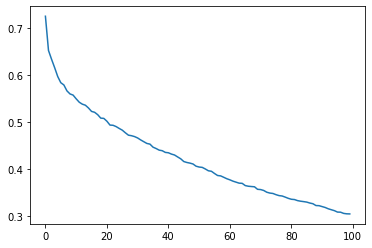

2011
[ 0  1  4  2  7  3 10 12 19 15  5 11 31 14 45  9 67 18 30 33 50  6 24 82
 75 42 49 37 41 27  8 55 65 22 21 40 52 57 26 43 56 97 46 70 60 85 38 83
 62 28 80 96 66 88 91 77 98 95 53 23 48 78 29 39 16 35 72 92 81 86 69 59
 32 25 93 61 64 74 63 71 90 68 89 79 54 17 13 44 36 84 58 20 76 73 94 47
 34 87 51]
[0.07563815 0.02938287 0.02122297 0.01209569 0.02891226 0.00720625
 0.00420745 0.01240313 0.00364146 0.00503915 0.01187873 0.00616492
 0.00828392 0.0009495  0.00540619 0.00773106 0.00203215 0.00094988
 0.00488861 0.00794514 0.00076116 0.00347448 0.00356249 0.0021673
 0.00410183 0.00182575 0.00307846 0.00366068 0.00247514 0.0020577
 0.00457039 0.00578556 0.00185783 0.00435847 0.0004199  0.00197886
 0.00089676 0.0037     0.00253813 0.00204122 0.00333873 0.00369989
 0.00398279 0.0030276  0.0009155  0.00536236 0.00280584 0.00043697
 0.00209942 0.00375774 0.00431703 0.00034715 0.0033255  0.00222045
 0.00095866 0.0035906  0.00285724 0.00325326 0.00083789 0.00186685
 0.00270548 0.00178405 0

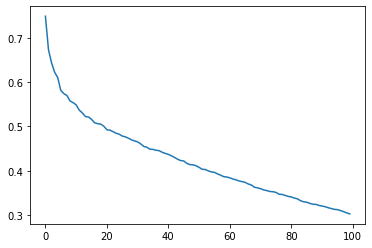

2012
[ 0  3  1 14  4  8 16  5 30 12 11  6 20 85 46 23 17  7 19 59 52 39 32 49
 38 64 96 61 44 55 53 76 69 93 28  2 70 31 27 89 81 75 41 21 42 13 79 66
 45 87 57 94 33 92 47 74 22  9 51 40 78 56 36 37 67 72 26 82 54 25 58 97
 65 80 35 18 71 15 24 60 83 43 91 50 34 86 62 48 73 63 95 84 29 88 90 77
 68 98 10]
[0.07302056 0.02489202 0.00322017 0.03118598 0.01156856 0.00787563
 0.00641208 0.00510416 0.01097159 0.0023471  0.00016737 0.00673503
 0.00703733 0.00275289 0.01281547 0.00128038 0.00909196 0.00516724
 0.00130454 0.00501872 0.006334   0.00285607 0.00238325 0.00522765
 0.00127068 0.00195397 0.00202667 0.00309532 0.00337295 0.00046794
 0.00719145 0.00311504 0.00435715 0.00247024 0.00114112 0.00155341
 0.00222488 0.00219669 0.00394935 0.00451048 0.00233942 0.00286025
 0.00283898 0.0012114  0.00382718 0.00256493 0.00528096 0.00244788
 0.00101501 0.00411449 0.00116691 0.00234576 0.00487437 0.00367446
 0.0019638  0.00375092 0.00226573 0.00253641 0.00193748 0.00492405
 0.00125761 0.00387602

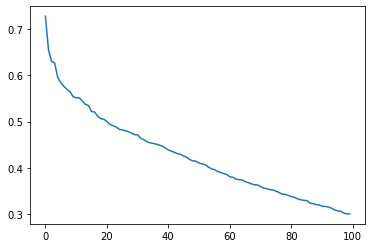

2013
[ 0  2  4  3  7  6 15  9  1  8  5 22 25 10 38 36 19 34 65 53 31 24 17 76
 37 28 20 11 95 46 67 85 44 48 89 55 30 39 13 23 59 60 70 58 12 73 52 62
 98 82 56 18 21 79 27 81 43 14 66 57 47 42 29 26 87 45 41 74 63 91 49 51
 33 61 64 78 75 69 92 32 50 96 84 71 90 40 94 83 93 72 35 80 68 54 16 97
 77 88 86]
[8.68314276e-02 7.76058872e-03 1.82431044e-02 1.46306997e-02
 1.81261791e-02 6.56355322e-03 1.14609340e-02 1.33305604e-02
 6.61450004e-03 8.75616097e-03 5.64423195e-03 3.84329756e-03
 3.01025245e-03 3.23441185e-03 2.32521108e-03 9.85240114e-03
 5.16317150e-04 4.42603723e-03 2.68038203e-03 4.76167709e-03
 3.96645556e-03 2.53541010e-03 6.15603262e-03 3.20497063e-03
 4.53284499e-03 5.84030358e-03 2.04505196e-03 2.47580201e-03
 4.06093458e-03 2.11789411e-03 3.29180423e-03 4.58032910e-03
 1.52969641e-03 1.80518669e-03 4.73796687e-03 8.38400552e-04
 4.85302846e-03 4.09996840e-03 5.36574997e-03 3.27384478e-03
 1.26320020e-03 1.94249201e-03 2.16327137e-03 2.33247832e-03
 3.54579412e-03 2.013

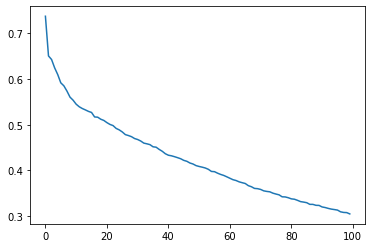

2014
[ 0  1  3  4  7  2  5  9 13 11 10 18 49 22 28 15 50 24 30  8 35 38 60 12
 20 27 41 44 84 64 54 17 46 86 96 40 23 62 53 61 67 70 47 69 79 16 73 34
 90 32 29 77 57 81 78  6 25 19 71 91 51 37 89 74 75 45 52 87 88 21 98 56
 94 33 59 36 55 80 14 42 76 85 26 43 97 65 58 92 68 72 39 31 48 82 93 63
 66 95 83]
[0.07823677 0.03118053 0.01262309 0.02888367 0.01398567 0.01007934
 0.002383   0.01292657 0.0046107  0.00827059 0.00590272 0.00661489
 0.00419187 0.00777485 0.00144045 0.00480094 0.00287272 0.00367633
 0.00586518 0.00233521 0.00399829 0.00170064 0.00519444 0.00333852
 0.00469625 0.00233761 0.00119583 0.00399277 0.00516559 0.00269806
 0.00467062 0.00080963 0.00271661 0.00163994 0.00282955 0.00459363
 0.0015566  0.00216987 0.00445817 0.00083367 0.00343588 0.00398464
 0.00134322 0.00111796 0.00393937 0.00187397 0.00365222 0.00313553
 0.00080472 0.00535596 0.00471188 0.0022447  0.00185663 0.00323731
 0.00369076 0.00149959 0.00165633 0.00262543 0.00097117 0.00160191
 0.00438507 0.00323056

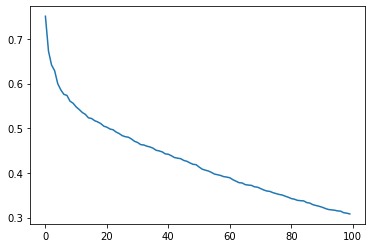

In [34]:
for season in range(1985, 2015):
    adj = sp.load_npz('./'+str(season)+'adj.npz')
    A = adj.tocsc()
    D_out = sp.diags(A.transpose().sum(
        axis=0).tolist(), [0]).tocsc()
    D_in = sp.diags(A.sum(axis=0).tolist(), [0]).tocsc()
    Dbar = (D_in + D_out)
    d = sqrtinvdiag(Dbar)
    normA = d * A * d
    size = A.shape[0]
    H = (A-A.transpose()) * 1j
    H_abs = np.abs(H)
    D_abs_inv = sp.diags(1/np.array(H_abs.sum(1))[:, 0])
    D_abs_inv.data[np.isinf(D_abs_inv.data)] = 0.0
    H_rw = D_abs_inv.dot(H)
    _, s, _ = sp.linalg.svds(H_rw, 100)
    eigens = s[list(np.arange(99,-1,-1))]
    eigengaps = eigens[:-1] - eigens[1:]
    print(season)
    print(np.argsort(-eigengaps))
    print(eigengaps)
    plt.plot(eigens)
    plt.show()

In [ ]:
# so choose K = 20 for all

In [12]:
import sklearn.cluster as sl
num_clusters = 20
u, s, vt = sp.linalg.svds(H_rw, num_clusters)
features_SVD = np.concatenate((np.real(u), np.imag(u)), axis=1)
x = sl.KMeans(n_clusters=num_clusters).fit_predict(features_SVD)

In [16]:
labels = x

In [14]:
import torch
import matplotlib.pyplot as plt

In [20]:
A = torch.FloatTensor(A.toarray())
P = torch.zeros(labels.shape[0], num_clusters).to(A.device)
for k in range(num_clusters):
    P[labels == k, k] = 1
flow_mat = np.ones([num_clusters, num_clusters])*0.5
for k in range(num_clusters-1):
    for l in range(k+1, num_clusters):
        w_kl = torch.matmul(P[:, k], torch.matmul(A, P[:, l])).item()
        w_lk = torch.matmul(P[:, l], torch.matmul(A, P[:, k])).item()
        if (w_kl + w_lk) > 0:
            flow_mat[k, l] = w_kl/(w_kl + w_lk)
            flow_mat[l, k] = w_lk/(w_kl + w_lk)

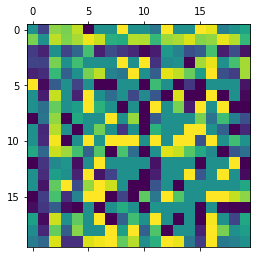

In [21]:
plt.matshow(flow_mat)

In [25]:
np.sum(flow_mat>0.9)

69